In [2]:
#!pip install yellowbrick <- First time running notebook

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib!=3.0.0,>=2.0.2 in c:\users\idunn\anaconda3\lib\site-packages (from yellowbrick) (3.2.2)



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [4]:
df_z = pd.read_parquet('../data/pre_processed/covid_cases_z_trans.parquet')

# Determining optimal k with Elbow method

This notebook determines the optimal K for K-means clustering, using the Elbow method. Se the connected paper for theory and reasoning behind the chosing the Elbow method. 

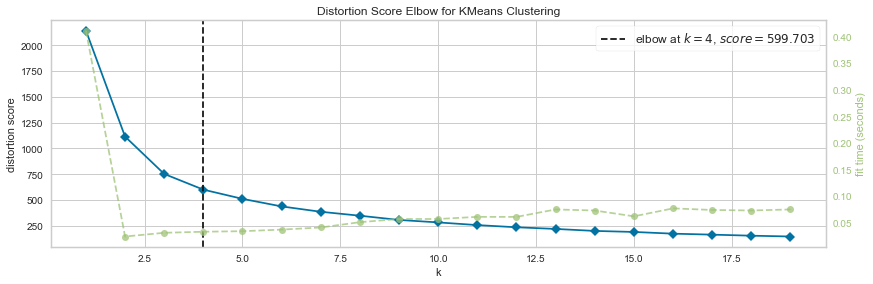

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20), metric='distortion', size=(1000, 300))

visualizer.fit(df_z.T)        
visualizer.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

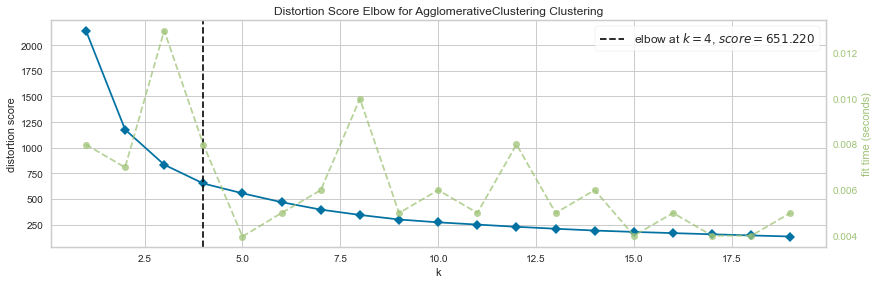

In [17]:
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
visualizer = KElbowVisualizer(model, k=(1,20), metric='distortion', size=(1000, 300))

visualizer.fit(df_z.T)        
visualizer.show()